In [51]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib

from matplotlib import pyplot as plt

import matplotlib.colors as mcolors

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.pyplot.rc('font', **font)

colors=list(mcolors.BASE_COLORS)


import numpy as np

In [28]:
from jetset.jet_model import Jet
from jetset.plot_sedfit import PlotSED

In [18]:
from jetset.jet_model import Jet

my_jet=Jet(name='BLR example',electron_distribution='bkn',beaming_expr='bulk_theta')
my_jet.add_EC_component(['EC_BLR','EC_Disk'])
my_jet.show_model()
my_jet.set_par('disk_type',val='MultiBB')
    


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLR example  

electron distribution:
 type: bkn  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

    name          par type           units             val         phys. bound. min  phys. b

In [69]:
my_jet.set_par('L_Disk',val=1E46)
my_jet.set_par('gmax',val=1E4)
my_jet.set_par('gmin',val=2.)
my_jet.set_par('R_H',val=3E17)

my_jet.set_par('p',val=1.5)
my_jet.set_par('p_1',val=3.2)
my_jet.set_par('R',val=3E15)
my_jet.set_par('B',val=1.5)
my_jet.set_par('z_cosm',val=0.6)
my_jet.set_par('BulkFactor',val=20)
my_jet.set_par('theta',val=1)
my_jet.set_par('gamma_break',val=5E2)
my_jet.set_N_from_nuLnu(nu_src=3E13,nuLnu_src=5E45)
my_jet.set_IC_nu_size(100)

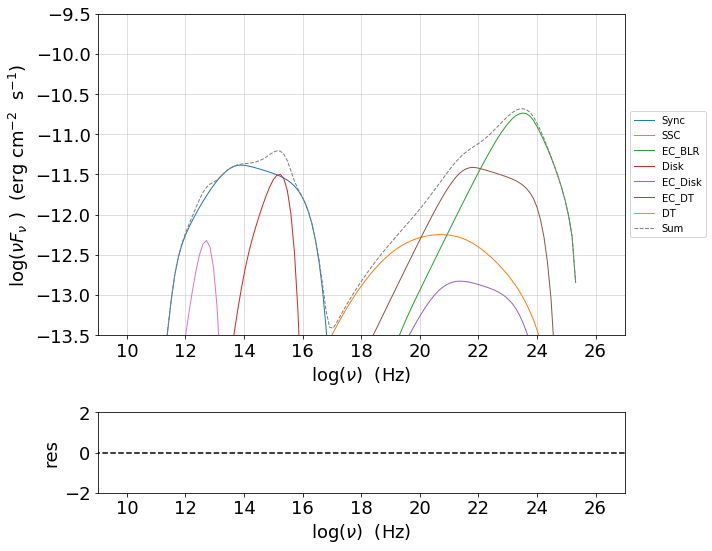

In [70]:
matplotlib.rc('font', **font)

my_jet.eval()
p=my_jet.plot_model(frame='obs')
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

In [71]:
matplotlib.rc('font', **font)
my_jet.add_EC_component('EC_DT')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLR example  

electron distribution:
 type: bkn  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+04
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
   name:EC_DT, state: on
   name:DT, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

    name          par type           units  

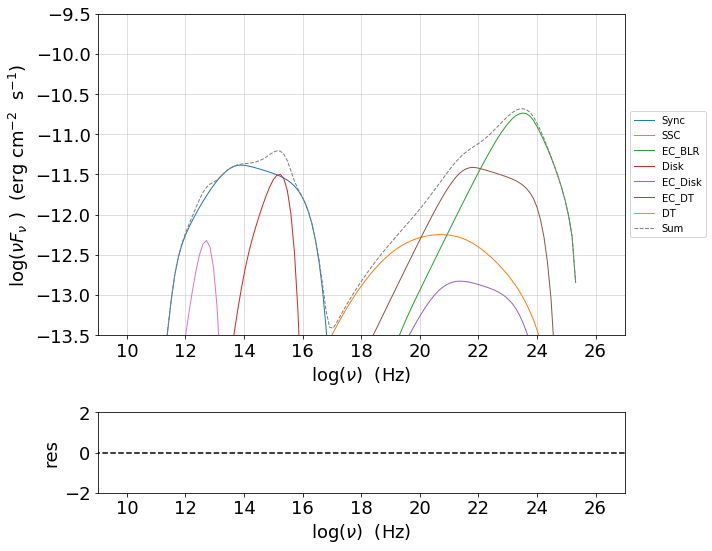

In [72]:
matplotlib.rc('font', **font)

my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)


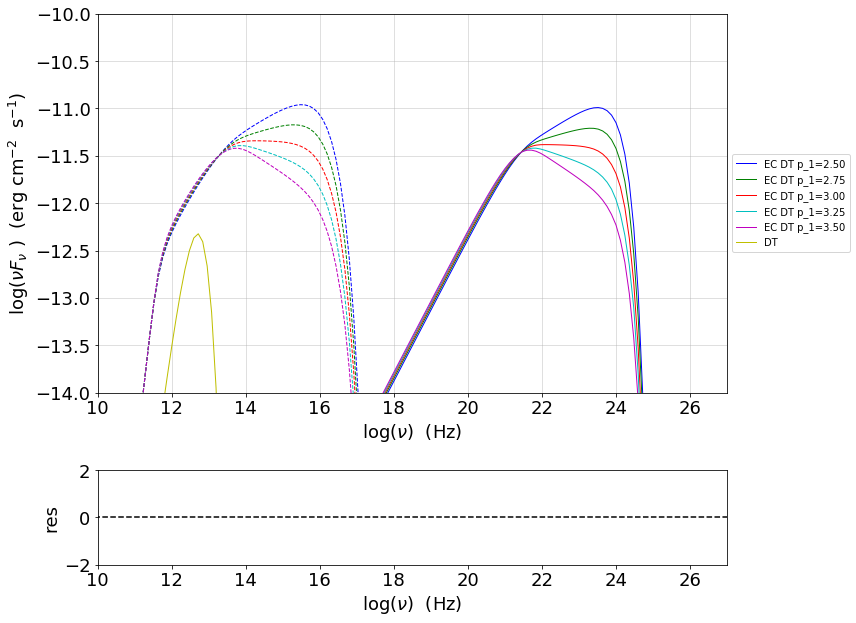

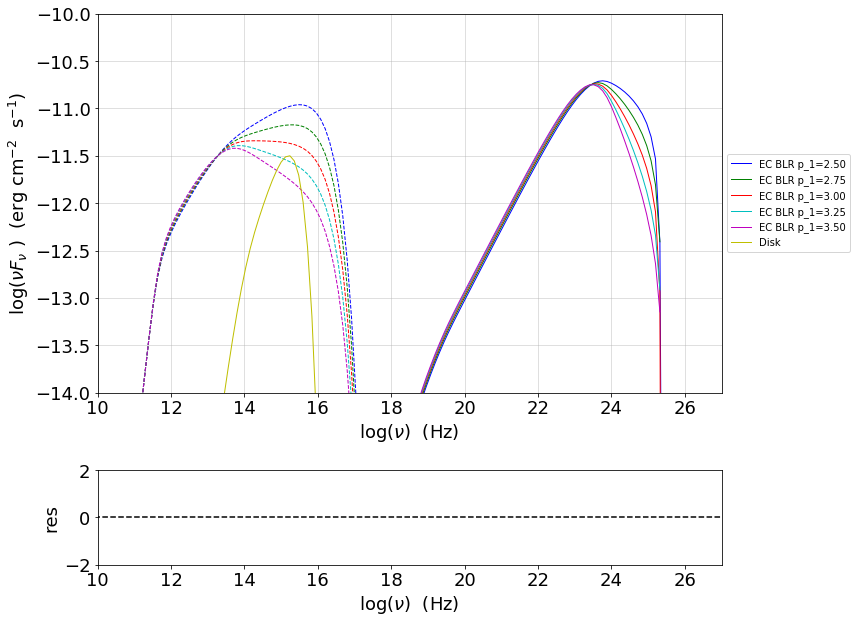

In [76]:
matplotlib.rc('font', **font)

my_jet.set_par('R_H',val=1E17)

size=5
p_dt=PlotSED(figsize=(12,9))
p_blr=PlotSED(figsize=(12,9))
for ID,p_1 in enumerate(np.linspace(2.5,3.5,5)):
    my_jet.parameters.p_1.val=p_1
    my_jet.set_N_from_nuLnu(nu_src=3E13,nuLnu_src=5E45)
    my_jet.eval()
    
    my_jet.plot_model(plot_obj=p_blr,comp='Sync',label=None,auto_label=False,line_style='--',color=colors[ID])
    my_jet.plot_model(plot_obj=p_dt,comp='Sync',label=None,auto_label=False,line_style='--',color=colors[ID])
    #my_jet.plot_model(plot_obj=p_blr,comp='Sum',label='p_1=%2.2f'%p_1,color=colors[ID])
    #my_jet.plot_model(plot_obj=p_dt,comp='Sum',label='p_1=%2.2f'%p_1,color=colors[ID])
    my_jet.plot_model(plot_obj=p_blr,comp='EC_BLR',label='EC BLR p_1=%2.2f'%p_1,color=colors[ID],auto_label=False)
    my_jet.plot_model(plot_obj=p_dt,comp='EC_DT',label='EC DT p_1=%2.2f'%p_1,color=colors[ID],auto_label=False)

my_jet.plot_model(plot_obj=p_dt,comp='DT',color=colors[ID+1])
my_jet.plot_model(plot_obj=p_blr,comp='Disk',color=colors[ID+1])

p_dt.rescale(y_max=-10,y_min=-14,x_min=10,x_max=27)
p_blr.rescale(y_max=-10,y_min=-14,x_min=10,x_max=27)